Import Data and Image Resize

In [21]:
import os

# Set the working directory to the SNAKES folder on your desktop
os.chdir("/Users/jules/Desktop/SNAKES")

#confirm opened
print(os.listdir())

['.DS_Store', 'pantherophis-alleghaniensis', 'heterodon-platirhinos', 'diadophis-punctatus', 'coluber-constrictor', 'crotalus-atrox', 'agkistrodon-piscivorus', 'nerodia-fasciata']


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [23]:
!pip install matplotlib Pillow
import os
from PIL import Image
import matplotlib.pyplot as plt
path_to_folder = "pantherophis-alleghaniensis"
files_in_folder = os.listdir(path_to_folder)
image_files = [file for file in files_in_folder if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    image_path = os.path.join(path_to_folder, image_files[0])  # This selects the first image file
else:
    print("No image files found in the folder")

Show original image and what it looks like after resize

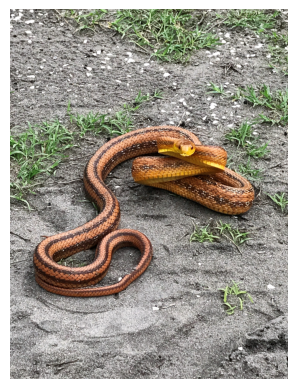

In [26]:
if image_files:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

In [27]:
# Define the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the image pixel values
    validation_split=0.2  # Assuming you want to split data for validation
)

# Specify the directory for training data and set parameters
train_generator = train_datagen.flow_from_directory(
    '/Users/jules/Desktop/SNAKES',  # Replace with your base directory
    target_size=(200, 200),  # Resize images to 200x200
    batch_size=32,  # Batch size (adjust as needed)
    class_mode='categorical',  # For multi-class classification
    subset='training'  # Specify subset as training
)

# Similarly, you can define a generator for validation data if needed
validation_generator = train_datagen.flow_from_directory(
    '/Users/jules/Desktop/SNAKES',  # Replace with your base directory
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2188 images belonging to 7 classes.
Found 546 images belonging to 7 classes.


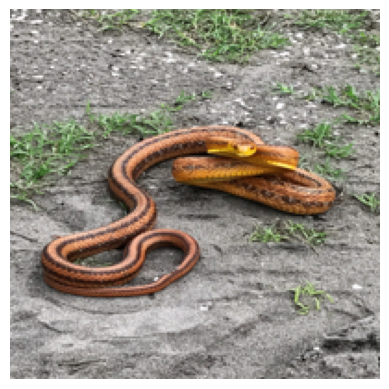

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
image_path = os.path.join(path_to_folder, image_files[0])
original_img = Image.open(image_path)

# Resize the image to 200x200
resized_img = original_img.resize((200, 200))

# Convert the image to a numpy array and normalize it
normalized_img = np.array(resized_img) / 255.0

# Display the resized and normalized image
plt.imshow(normalized_img)
plt.axis('off')  # Turn off axis numbers
plt.show()


Build "Alexnet" model 

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad, Nadam, Adadelta, RMSprop

def Build_AlexNet_like_CNN(conv_layers, dense_layers, kernel_sizes, pool_sizes, strides, dropout_rates, optimizer='Adam', learning_rate=0.001, input_shape=(200, 200, 3), num_classes=7):
    model = Sequential()

    # Add convolutional layers
    for i in range(len(conv_layers)):
        if i == 0:
            model.add(Conv2D(conv_layers[i], kernel_sizes[i], strides=strides[i], padding='valid', activation='relu', input_shape=input_shape))
        else:
            model.add(Conv2D(conv_layers[i], kernel_sizes[i], padding='same', activation='relu'))

        model.add(MaxPooling2D(pool_sizes[i], strides=strides[i], padding='same'))
        model.add(BatchNormalization())

    # Flatten the output
    model.add(Flatten())

    # Add dense layers
    for i in range(len(dense_layers)):
        model.add(Dense(dense_layers[i], activation='relu'))
        if dropout_rates[i] > 0:
            model.add(Dropout(dropout_rates[i]))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with the specified optimizer
    if optimizer == 'Adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'Adagrad':
        opt = Adagrad(learning_rate=learning_rate)
    elif optimizer == 'Nadam':
        opt = Nadam(learning_rate=learning_rate)
    elif optimizer == 'Adadelta':
        opt = Adadelta(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer. Please provide one of ['Adam', 'Adagrad', 'Nadam', 'Adadelta', 'RMSprop'].")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [10]:
# Architecture parameters from HW5
conv_layers = [96, 256, 384, 384, 256]  # # of filters for each conv layer
kernel_sizes = [(5, 5), (3, 3), (3, 3), (3, 3), (3, 3)]  # kernel sizes for each conv layer
pool_sizes = [(2, 2), (2, 2), (2, 2), (2, 2), (2, 2)]  # pooling sizes for each conv layer
strides = [(2, 2), (2, 2), (1, 1), (1, 1), (2, 2)]  # strides for each conv and pooling layer
dense_layers = [256, 256]  # dense layers configuration
dropout_rates = [0.5, 0.5]  # dropout rates for each dense layer

# Build and compile the model
model = Build_AlexNet_like_CNN(conv_layers, dense_layers, kernel_sizes, pool_sizes, strides, dropout_rates, optimizer='Adam', learning_rate=0.001, input_shape=(200, 200, 3), num_classes=7)

# Display the model summary
model.summary()
#model debugged and modified using chatgbt


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 96)        7296      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 49, 49, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 256)       221440    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 256)       0         
 g2D)                                                            
                                                        

Hyperparamture tuning

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def CNN_Hyper_Parameter_Tuning_AlexNet(optimizers_names, learning_rates, batch_sizes, epochs, base_dir, input_shape, num_classes, num_replicates=2):
    best_avg_accuracy = 0.0
    all_avg_accuracy = np.zeros((len(optimizers_names), len(learning_rates), len(batch_sizes)))

    conv_layers = [96, 256, 384, 384, 256]  # # of filters for each conv layer
    kernel_sizes = [(5, 5), (3, 3), (3, 3), (3, 3), (3, 3)]  # kernel sizes for each conv layer
    pool_sizes = [(2, 2), (2, 2), (2, 2), (2, 2), (2, 2)]  # pooling sizes for each conv layer
    strides = [(2, 2), (2, 2), (1, 1), (1, 1), (2, 2)]  # strides for each conv and pooling layer
    dense_layers = [256, 256]  # dense layers configuration
    dropout_rates = [0.5, 0.5]  # dropout rates for each dense layer

    best_hyper_parameters = {
        "optimizer": None,
        "learning_rate": None,
        "batch_size": None,
        "best_avg_accuracy": None
    }

    for opt_name in optimizers_names:
        for lr in learning_rates:
            for bs in batch_sizes:
                # Reinitialize the ImageDataGenerators with the current batch size
                train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
                train_generator = train_datagen.flow_from_directory(
                    base_dir, target_size=input_shape[:2], batch_size=bs, class_mode='categorical', subset='training')
                validation_generator = train_datagen.flow_from_directory(
                    base_dir, target_size=input_shape[:2], batch_size=bs, class_mode='categorical', subset='validation')

                steps_per_epoch = np.ceil(train_generator.samples / bs)
                validation_steps = np.ceil(validation_generator.samples / bs)

                collect_accuracy = []
                for i in range(num_replicates):
                    print(f"Running for {opt_name} optimizer {lr} learning_rate {bs} batch_size and {i} replicate \n")

                    # Build the model
                    model = Build_AlexNet_like_CNN(conv_layers, dense_layers, kernel_sizes, pool_sizes, strides, dropout_rates, optimizer=opt_name, learning_rate=lr, input_shape=input_shape, num_classes=num_classes)

                    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
                    history = model.fit(
                        train_generator,
                        steps_per_epoch=steps_per_epoch,
                        epochs=epochs,
                        validation_data=validation_generator,
                        validation_steps=validation_steps,
                        callbacks=[callback]
                    )
                    collect_accuracy.append(history.history['val_accuracy'][-1])

                avg_accuracy = np.mean(collect_accuracy)
                all_avg_accuracy[optimizers_names.index(opt_name)][learning_rates.index(lr)][batch_sizes.index(bs)] = avg_accuracy

                if avg_accuracy > best_avg_accuracy:
                    best_avg_accuracy = avg_accuracy
                    best_hyper_parameters = {
                        "optimizer": opt_name,
                        "learning_rate": lr,
                        "batch_size": bs,
                        "best_avg_accuracy": best_avg_accuracy
                    }

    output_dictionary = {
        "best_hyper_parameters": best_hyper_parameters,
        "all_avg_accuracy": all_avg_accuracy
    }

    print("Best_hyper_parameters(AlexNet CNN): \n", output_dictionary['best_hyper_parameters'])
    print("all_avg_accuracy(AlexNet CNN): \n", output_dictionary['all_avg_accuracy'])

    return output_dictionary['best_hyper_parameters']


Hyperparameter tuning for optimizers only to save time 

In [33]:
# Parameters for hyperparameter tuning ADAM
optimizers_names = ['Adam']
learning_rates = [0.005]
batch_sizes = [16]
epochs = 1
num_replicates = 2

# Directory where your images are stored
base_dir = "/Users/jules/Desktop/SNAKES"

# Input shape and number of classes
input_shape = (200, 200, 3)  # images are 200x200 with 3 color channels
num_classes = 7  # number of classes you have

# Call the function with the correct parameters
alexnet_best_hyper_parameters = CNN_Hyper_Parameter_Tuning_AlexNet(
    optimizers_names, learning_rates, batch_sizes, epochs, base_dir, input_shape, num_classes, num_replicates
)
print(alexnet_best_hyper_parameters)


Found 2188 images belonging to 7 classes.
Found 546 images belonging to 7 classes.
Running for Adam optimizer 0.005 learning_rate 16 batch_size and 0 replicate 

137/137 [==============================] - 274s 2s/step - loss: 32.6272 - accuracy: 0.1463 - val_loss: 2.3147 - val_accuracy: 0.1429
Running for Adam optimizer 0.005 learning_rate 16 batch_size and 1 replicate 

137/137 [==============================] - 257s 2s/step - loss: 37.1608 - accuracy: 0.1522 - val_loss: 1.9575 - val_accuracy: 0.1429
Best_hyper_parameters(AlexNet CNN): 
 {'optimizer': 'Adam', 'learning_rate': 0.005, 'batch_size': 16, 'best_avg_accuracy': 0.1428571492433548}
all_avg_accuracy(AlexNet CNN): 
 [[[0.14285715]]]
{'optimizer': 'Adam', 'learning_rate': 0.005, 'batch_size': 16, 'best_avg_accuracy': 0.1428571492433548}


In [34]:
# Parameters for hyperparameter tuning NADAM
optimizers_names = ['Nadam']
learning_rates = [0.005]
batch_sizes = [16]
epochs = 1
num_replicates = 2

# Directory where your images are stored
base_dir = "/Users/jules/Desktop/SNAKES"

# Input shape and number of classes
input_shape = (200, 200, 3)  # images are 200x200 with 3 color channels
num_classes = 7  # number of classes you have

# Call the function with the correct parameters
alexnet_best_hyper_parameters = CNN_Hyper_Parameter_Tuning_AlexNet(
    optimizers_names, learning_rates, batch_sizes, epochs, base_dir, input_shape, num_classes, num_replicates
)
print(alexnet_best_hyper_parameters)

Found 2188 images belonging to 7 classes.
Found 546 images belonging to 7 classes.
Running for Nadam optimizer 0.005 learning_rate 16 batch_size and 0 replicate 

137/137 [==============================] - 275s 2s/step - loss: 24.8753 - accuracy: 0.1481 - val_loss: 2.3635 - val_accuracy: 0.1447
Running for Nadam optimizer 0.005 learning_rate 16 batch_size and 1 replicate 

137/137 [==============================] - 255s 2s/step - loss: 24.6806 - accuracy: 0.1431 - val_loss: 8.4127 - val_accuracy: 0.1612
Best_hyper_parameters(AlexNet CNN): 
 {'optimizer': 'Nadam', 'learning_rate': 0.005, 'batch_size': 16, 'best_avg_accuracy': 0.15293040871620178}
all_avg_accuracy(AlexNet CNN): 
 [[[0.15293041]]]
{'optimizer': 'Nadam', 'learning_rate': 0.005, 'batch_size': 16, 'best_avg_accuracy': 0.15293040871620178}


In [35]:
# Parameters for hyperparameter tuning ADAGRAD
optimizers_names = ['Adagrad']
learning_rates = [0.005]
batch_sizes = [16]
epochs = 1
num_replicates = 2

# Directory where your images are stored
base_dir = "/Users/jules/Desktop/SNAKES"

# Input shape and number of classes
input_shape = (200, 200, 3)  # images are 200x200 with 3 color channels
num_classes = 7  # number of classes you have

# Call the function with the correct parameters
alexnet_best_hyper_parameters = CNN_Hyper_Parameter_Tuning_AlexNet(
    optimizers_names, learning_rates, batch_sizes, epochs, base_dir, input_shape, num_classes, num_replicates
)
print(alexnet_best_hyper_parameters)

Found 2188 images belonging to 7 classes.
Found 546 images belonging to 7 classes.
Running for Adagrad optimizer 0.005 learning_rate 16 batch_size and 0 replicate 

137/137 [==============================] - 240s 2s/step - loss: 3.6635 - accuracy: 0.1531 - val_loss: 2.0030 - val_accuracy: 0.1447
Running for Adagrad optimizer 0.005 learning_rate 16 batch_size and 1 replicate 

137/137 [==============================] - 251s 2s/step - loss: 3.7252 - accuracy: 0.1618 - val_loss: 2.0044 - val_accuracy: 0.1758
Best_hyper_parameters(AlexNet CNN): 
 {'optimizer': 'Adagrad', 'learning_rate': 0.005, 'batch_size': 16, 'best_avg_accuracy': 0.16025641560554504}
all_avg_accuracy(AlexNet CNN): 
 [[[0.16025642]]]
{'optimizer': 'Adagrad', 'learning_rate': 0.005, 'batch_size': 16, 'best_avg_accuracy': 0.16025641560554504}


Adagrad had highest accuracy so now tune learning rate and batch sizes

In [39]:
# Parameters for hyperparameter tuning
optimizers_names = ['Adagrad']
learning_rates = [0.001,0.005,0.01]
batch_sizes = [16,32,64]
epochs = 3
num_replicates = 2

# Directory where your images are stored
base_dir = "/Users/jules/Desktop/SNAKES"

# Input shape and number of classes
input_shape = (200, 200, 3)  # images are 200x200 with 3 color channels
num_classes = 7  # number of classes you have

# Call the function with the correct parameters
alexnet_best_hyper_parameters = CNN_Hyper_Parameter_Tuning_AlexNet(
    optimizers_names, learning_rates, batch_sizes, epochs, base_dir, input_shape, num_classes, num_replicates
)
print(alexnet_best_hyper_parameters)

Found 2188 images belonging to 7 classes.
Found 546 images belonging to 7 classes.
Running for Adagrad optimizer 0.001 learning_rate 16 batch_size and 0 replicate 

Epoch 1/3
137/137 [==============================] - 211s 2s/step - loss: 2.5786 - accuracy: 0.1814 - val_loss: 2.0198 - val_accuracy: 0.1447
Epoch 2/3
137/137 [==============================] - 195s 1s/step - loss: 1.9562 - accuracy: 0.2459 - val_loss: 2.2017 - val_accuracy: 0.1502
Epoch 3/3
137/137 [==============================] - 224s 2s/step - loss: 1.8389 - accuracy: 0.2843 - val_loss: 2.2283 - val_accuracy: 0.2161
Running for Adagrad optimizer 0.001 learning_rate 16 batch_size and 1 replicate 

Epoch 1/3
137/137 [==============================] - 206s 1s/step - loss: 2.5481 - accuracy: 0.1842 - val_loss: 2.1039 - val_accuracy: 0.1502
Epoch 2/3
137/137 [==============================] - 192s 1s/step - loss: 2.0013 - accuracy: 0.2340 - val_loss: 2.0427 - val_accuracy: 0.1502
Epoch 3/3
137/137 [========================

Trying lower learning rates just to see!

In [45]:
# Parameters for hyperparameter tuning
optimizers_names = ['Adagrad']
learning_rates = [0.0005,0.0001,]
batch_sizes = [16]
epochs = 1
num_replicates = 2

# Directory where your images are stored
base_dir = "/Users/jules/Desktop/SNAKES"

# Input shape and number of classes
input_shape = (200, 200, 3)  # images are 200x200 with 3 color channels
num_classes = 7  # number of classes you have

# Call the function with the correct parameters
alexnet_best_hyper_parameters = CNN_Hyper_Parameter_Tuning_AlexNet(
    optimizers_names, learning_rates, batch_sizes, epochs, base_dir, input_shape, num_classes, num_replicates
)
print(alexnet_best_hyper_parameters)

Found 2188 images belonging to 7 classes.
Found 546 images belonging to 7 classes.
Running for Adagrad optimizer 0.0005 learning_rate 16 batch_size and 0 replicate 

137/137 [==============================] - 208s 2s/step - loss: 2.4298 - accuracy: 0.1924 - val_loss: 2.0626 - val_accuracy: 0.1502
Running for Adagrad optimizer 0.0005 learning_rate 16 batch_size and 1 replicate 

137/137 [==============================] - 202s 1s/step - loss: 2.4798 - accuracy: 0.1778 - val_loss: 2.0333 - val_accuracy: 0.1502
Found 2188 images belonging to 7 classes.
Found 546 images belonging to 7 classes.
Running for Adagrad optimizer 0.0001 learning_rate 16 batch_size and 0 replicate 

137/137 [==============================] - 222s 2s/step - loss: 2.6639 - accuracy: 0.1673 - val_loss: 2.0061 - val_accuracy: 0.1410
Running for Adagrad optimizer 0.0001 learning_rate 16 batch_size and 1 replicate 

137/137 [==============================] - 209s 2s/step - loss: 2.6962 - accuracy: 0.1718 - val_loss: 1.98

In [42]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Run final model 

Found 2184 images belonging to 7 classes.
Found 543 images belonging to 7 classes.
Epoch 1/10
136/136 [==============================] - 388s 3s/step - loss: 2.5844 - accuracy: 0.1697 - val_loss: 2.1836 - val_accuracy: 0.1496
Epoch 2/10
136/136 [==============================] - 364s 3s/step - loss: 2.0001 - accuracy: 0.2269 - val_loss: 2.2213 - val_accuracy: 0.1553
Epoch 3/10
136/136 [==============================] - 355s 3s/step - loss: 1.8504 - accuracy: 0.2777 - val_loss: 2.2511 - val_accuracy: 0.1591
Epoch 4/10
136/136 [==============================] - 2395s 18s/step - loss: 1.7373 - accuracy: 0.3293 - val_loss: 1.8039 - val_accuracy: 0.2841
Epoch 5/10
136/136 [==============================] - 755s 6s/step - loss: 1.6386 - accuracy: 0.3616 - val_loss: 1.5921 - val_accuracy: 0.4432
Epoch 6/10
136/136 [==============================] - 1816s 13s/step - loss: 1.5509 - accuracy: 0.3994 - val_loss: 1.5204 - val_accuracy: 0.4659
Epoch 7/10
136/136 [==============================] - 9

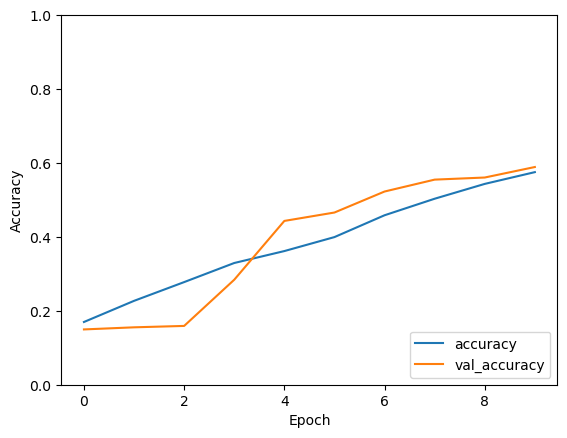

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory where images are stored
base_dir = "/Users/jules/Desktop/SNAKES"

# Create an instance of ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Define the batch size and target image size : 
batch_size = 16
target_size = (200, 200)

# Load and preprocess images from the directories
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build and compile the model
model = Build_AlexNet_like_CNN(conv_layers, dense_layers, kernel_sizes, pool_sizes, strides, dropout_rates, optimizer='Adagrad', learning_rate=0.001, input_shape=(200, 200, 3), num_classes=7)

# Define steps per epoch and validation steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Display the training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


Running final in steps and checking images. Using more epochs for higher accuracy 

Found 2184 images belonging to 7 classes.
Found 543 images belonging to 7 classes.
Image batch shape: (16, 200, 200, 3)
Labels batch shape: (16, 7)


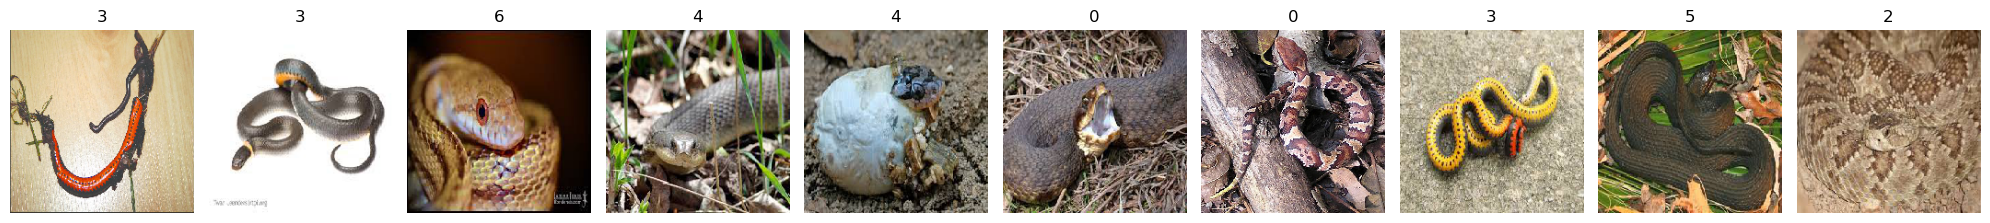

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directory where your images are stored
base_dir = "/Users/jules/Desktop/SNAKES"

# Create an instance of ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Define the batch size and target image size
batch_size = 16
target_size = (200, 200)

# Load and preprocess images from the directories
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Function to visualize images
def plot_images(images_arr, labels):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax, lbl in zip(images_arr, axes, labels):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(lbl)
    plt.tight_layout()
    plt.show()

# Generate a batch of images and labels
for images_batch, labels_batch in train_generator:
    print(f"Image batch shape: {images_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    
    # Plot images with labels
    plot_images(images_batch, labels_batch.argmax(axis=1))
    
    break  # We only want to look at one batch


In [61]:
# [Include your Build_AlexNet_like_CNN function definition here]

# Define your model parameters here
conv_layers = [96, 256, 384, 384, 256]  # # of filters for each conv layer
kernel_sizes = [(5, 5), (3, 3), (3, 3), (3, 3), (3, 3)]  # kernel sizes for each conv layer
pool_sizes = [(2, 2), (2, 2), (2, 2), (2, 2), (2, 2)]  # pooling sizes for each conv layer
strides = [(2, 2), (2, 2), (1, 1), (1, 1), (2, 2)]  # strides for each conv and pooling layer
dense_layers = [256, 256]  # dense layers configuration
dropout_rates = [0.5, 0.5]  # dropout rates for each dense layer

# Build and compile the model
model = Build_AlexNet_like_CNN(conv_layers, dense_layers, kernel_sizes, pool_sizes, strides, dropout_rates, optimizer='Adagrad', learning_rate=0.001, input_shape=(200, 200, 3), num_classes=7)

Replication 1/3
Epoch 1/10
136/136 [==============================] - 387s 3s/step - loss: 2.5859 - accuracy: 0.1771 - val_loss: 2.0917 - val_accuracy: 0.1553
Epoch 2/10
136/136 [==============================] - 348s 3s/step - loss: 2.0023 - accuracy: 0.2209 - val_loss: 2.0837 - val_accuracy: 0.1439
Epoch 3/10
136/136 [==============================] - 347s 3s/step - loss: 1.8678 - accuracy: 0.2588 - val_loss: 2.0394 - val_accuracy: 0.2045
Epoch 4/10
136/136 [==============================] - 351s 3s/step - loss: 1.7912 - accuracy: 0.3007 - val_loss: 1.8299 - val_accuracy: 0.2898
Epoch 5/10
136/136 [==============================] - 346s 3s/step - loss: 1.6771 - accuracy: 0.3501 - val_loss: 1.6404 - val_accuracy: 0.4205
Epoch 6/10
136/136 [==============================] - 349s 3s/step - loss: 1.5847 - accuracy: 0.3819 - val_loss: 1.5306 - val_accuracy: 0.4678
Epoch 7/10
136/136 [==============================] - 350s 3s/step - loss: 1.4710 - accuracy: 0.4400 - val_loss: 1.4543 - val_

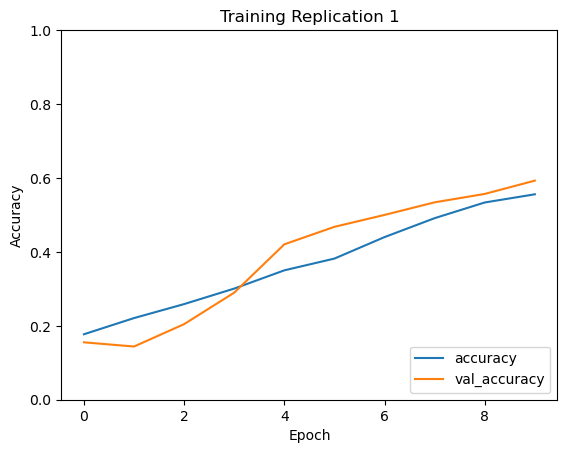

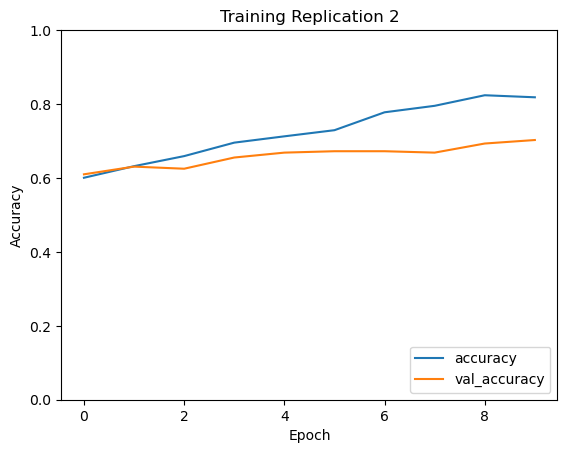

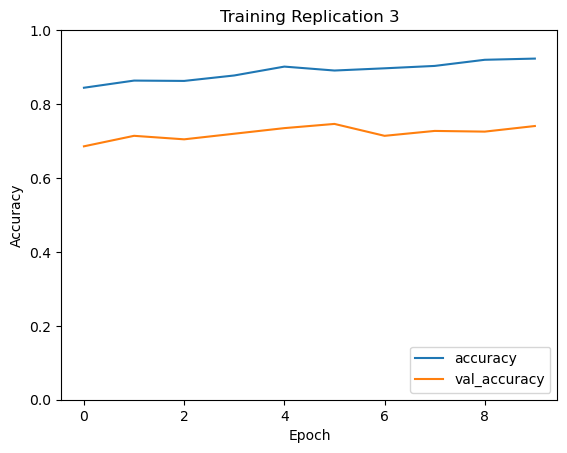

In [62]:
# Define steps per epoch and validation steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Define the number of times to replicate the training
num_replications = 3

for replication in range(num_replications):
    print(f"Replication {replication + 1}/{num_replications}")

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_steps
    )

    # Find the best accuracy
    best_accuracy = max(history.history['val_accuracy'])
    print(f"Best validation accuracy in replication {replication + 1}: {best_accuracy}")

    # Optionally, print the model's parameters of interest
    print("Model Parameters:")
    print(f"Convolutional layers: {conv_layers}")
    print(f"Dense layers: {dense_layers}")
    # Add other parameters you're interested in

    # Display the training history (optional)
    plt.figure(replication)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f"Training Replication {replication + 1}")

plt.show()

space between accuracy and val_accuracy indicate potential overfitting. Highest accurasy = 0.92%